| Naam | Studienummer |
| ---- | ------------ |
|Tom Vermeulen | 6441637 |

Favoriete Natuurkundige formule:

$F_{res}=m*a$

- $F_{res}$, resulterende kracht
- $m$, massa
- $a$, versnelling

Opdracht: Voeg hier een foto van je eendje in.
![image](DEF-D\figures\download.jpg)

Opdracht: Berekening en Grafiek

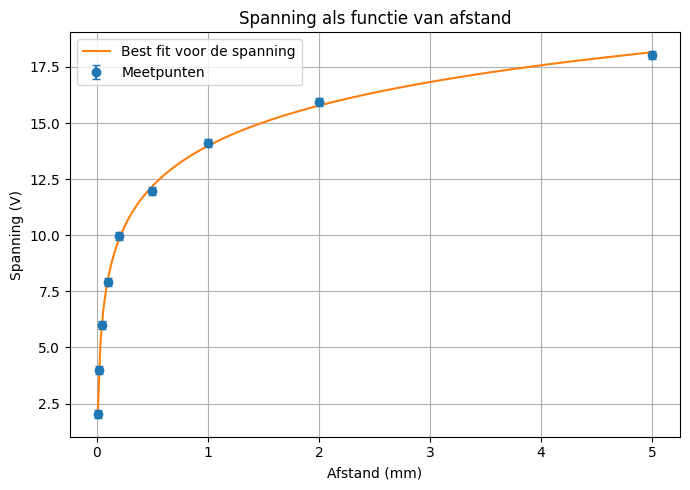

Geschatte meetonzekerheid σ_y = 0.1764 V


In [1]:
# Importeren van numpy en matplotlib library
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Meetgegevens: afstand in millimeter, spanning in Volt
afstand = np.array([0.01,0.02,0.05,0.1,0.2,0.5,1.0,2.0,5.0]) 
spanning = np.array([2.01868928,4.01442631,5.99586649,7.91166258,9.96850493,11.96229652
                     ,14.1133456,15.93947672,18.04932637])

# Vul hieronder je eigen code aan om de grafiek te maken. Vergeet niet ook de onzekerheid en de fit!

from scipy.optimize import curve_fit

def model(x, a, b):
    return a * np.log(x) + b

popt, pcov = curve_fit(model, afstand, spanning)

a, b = popt
sigma_a, sigma_b = np.sqrt(np.diag(pcov))

x_fit = np.linspace(min(afstand), max(afstand), 200)
y_fit = model(x_fit, a, b)

residuals = spanning - model(afstand, a, b)
sigma_y = np.std(residuals, ddof=2)

plt.figure(figsize=(7,5))

plt.errorbar(afstand, spanning, yerr=sigma_y, fmt='o',
             capsize=3, label='Meetpunten')

plt.plot(x_fit, y_fit,
         label=f'Best fit voor de spanning')

plt.xlabel('Afstand (mm)')
plt.ylabel('Spanning (V)')
plt.title('Spanning als functie van afstand')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Resultaten printen
print(f"Geschatte meetonzekerheid σ_y = {sigma_y:.4f} V")

